In [1]:
import awkward as ak
import pathlib
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, MultipleLocator, ScalarFormatter, AutoMinorLocator
from scipy.optimize import curve_fit
from scipy import stats
import atlas_mpl_style as ampl
ampl.use_atlas_style()
plt.style.use('seaborn-v0_8-colorblind')
#np.set_printoptions(threshold=1000)
#%matplotlib inline
#%matplotlib widget
#from codes.plotting import plot_prettier 
#plot_prettier()

In [2]:
# Using local path, takes ~ 1 min
# bib = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\stau_output_reco_bib.json"))
# bib_10 = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\stau_output_reco_bib_10.json"))
# run_14_bib = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\run_14_reco_bib.json"))
# run_14_nobib = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\run_14_reco.json"))
# bib_134_10 = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\134_10_reco_bib.json"))
# bib_134_01 = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\134_0.1_reco_bib.json"))
# bib_134_1 = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\134_1_reco_bib.json"))
# bib_300_10 = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\300_10_reco_bib.json"))
# nobib_134_1 = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\134_1_reco.json"))
# nobib = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\stau_output_reco.json"))
# sim = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\stau_output_sim.json"))
# run_14_sim = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\run_14_sim.json"))
# sim_134_1 = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\134_1_sim.json"))
# digi = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\stau_output_digi.json"))
# digi_bib = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\stau_output_digi_bib.json"))
# digi_bib_10 = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\stau_output_digi_bib_10.json"))
# digi_bib_134_1 = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\134_1_digi_bib.json"))

# Using SSHFS, takes ~ 3 mins (5 mins when not plugged in)
# Run the following command in command prompt as administrator
# net use X: \\sshfs.r\lrozanov@kdplab01.uchicago.edu
bib = ak.from_json(pathlib.Path(r"X:\local\d1\lrozanov\mucoll-tutorial-2023\reco_Hbb_bib\stau_output_reco_bib.json"))
bib_10 = ak.from_json(pathlib.Path(r"X:\local\d1\lrozanov\mucoll-tutorial-2023\reco_Hbb_bib\stau_output_reco_bib_10.json"))
run_14_bib = ak.from_json(pathlib.Path(r"X:\local\d1\lrozanov\mucoll-tutorial-2023\reco_Hbb_bib\run_14_reco_bib.json"))
run_14_nobib = ak.from_json(pathlib.Path(r"X:\local\d1\lrozanov\mucoll-tutorial-2023\reco_Hbb\run_14_reco.json"))
bib_134_10 = ak.from_json(pathlib.Path(r"X:\local\d1\lrozanov\mucoll-tutorial-2023\reco_Hbb_bib\134_10_reco_bib.json"))
bib_134_01 = ak.from_json(pathlib.Path(r"X:\local\d1\lrozanov\mucoll-tutorial-2023\reco_Hbb_bib\134_0.1_reco_bib.json"))
bib_134_1 = ak.from_json(pathlib.Path(r"X:\local\d1\lrozanov\mucoll-tutorial-2023\reco_Hbb_bib\134_1_reco_bib.json"))
bib_300_10 = ak.from_json(pathlib.Path(r"X:\local\d1\lrozanov\mucoll-tutorial-2023\reco_Hbb_bib\300_10_reco_bib.json"))
nobib_134_1 = ak.from_json(pathlib.Path(r"X:\local\d1\lrozanov\mucoll-tutorial-2023\reco_Hbb\134_1_reco.json"))
nobib = ak.from_json(pathlib.Path(r"X:\local\d1\lrozanov\mucoll-tutorial-2023\reco_Hbb\stau_output_reco.json"))
sim = ak.from_json(pathlib.Path(r"X:\local\d1\lrozanov\mucoll-tutorial-2023\sim_Hbb\stau_output_sim.json"))
run_14_sim = ak.from_json(pathlib.Path(r"X:\local\d1\lrozanov\mucoll-tutorial-2023\sim_Hbb\run_14_sim.json"))
sim_134_1 = ak.from_json(pathlib.Path(r"X:\local\d1\lrozanov\mucoll-tutorial-2023\sim_Hbb\134_1_sim.json"))
digi = ak.from_json(pathlib.Path(r"X:\local\d1\lrozanov\mucoll-tutorial-2023\digi_Hbb\stau_output_digi.json"))
digi_bib = ak.from_json(pathlib.Path(r"X:\local\d1\lrozanov\mucoll-tutorial-2023\digi_Hbb_bib\stau_output_digi_bib.json"))
digi_bib_10 = ak.from_json(pathlib.Path(r"X:\local\d1\lrozanov\mucoll-tutorial-2023\digi_Hbb_bib\stau_output_digi_bib_10.json"))
digi_bib_134_1 = ak.from_json(pathlib.Path(r"X:\local\d1\lrozanov\mucoll-tutorial-2023\digi_Hbb_bib\134_1_digi_bib.json"))


In [3]:
mcp_pt = bib_134_1['mcp_pt']
mcp_eta = bib_134_1['mcp_eta']
mcp_phi = bib_134_1['mcp_phi'] 

status = bib_134_1['status']
pdgid = bib_134_1['pdgid']

mcp_mu_pt = bib_134_1['mcp_mu_pt']
mcp_mu_eta = bib_134_1['mcp_mu_eta']
mcp_mu_phi = bib_134_1['mcp_mu_phi']

nhits = bib_134_1['nhits']
pixel_nhits = bib_134_1['pixel_nhits']
inner_nhits = bib_134_1['inner_nhits']
outer_nhits = bib_134_1['outer_nhits']
pt_res_hits = bib_134_1['pt_res_hits']
d0_res = bib_134_1['d0_res']
z0_res = bib_134_1['z0_res']
track_pt = bib_134_1['track_pt']
pt_res = bib_134_1['pt_res'] 
pt_match = bib_134_1['pt_match'] #THIS IS TRUTH PT
eta_match = bib_134_1['eta_match'] #Truth eta
track_eta = bib_134_1['track_eta'] #Track eta
theta_match = bib_134_1['theta_match']
phi_match = bib_134_1['phi_match'] #Track phi
d0_res_match = bib_134_1['d0_res_match']
z0_res_match = bib_134_1['z0_res_match']
ndf = bib_134_1['ndf']
chi2 = bib_134_1['chi2']

x = bib_134_1['x']
y = bib_134_1['y']
z = bib_134_1['z']
hit_pdgid = bib_134_1['hit_pdgid'] # this doesn't seem to work
time = bib_134_1['time']
corrected_time = bib_134_1['corrected_time']
hit_detector = bib_134_1['hit_detector'] # 1/2 = pixel, 3/4 = inner, 5/6 = outer (barrel/endcap)
hit_layer = bib_134_1['hit_layer'] # pixel has 8/8 layers, inner has 3/6, outer has 3/4
hit_side = bib_134_1['hit_side'] # can be 0, -1, or 1. Perhaps this is the side of the detector


In [4]:
VB_x = digi_bib_134_1["VB_x"]
VB_y = digi_bib_134_1["VB_y"]
VB_z = digi_bib_134_1["VB_z"]
VB_time = digi_bib_134_1["VB_time"]
VB_pdg = digi_bib_134_1["VB_pdg"]

VE_x = digi_bib_134_1["VE_x"]
VE_y = digi_bib_134_1["VE_y"]
VE_z = digi_bib_134_1["VE_z"]
VE_time = digi_bib_134_1["VE_time"]
VE_pdg = digi_bib_134_1["VE_pdg"]

IB_x = digi_bib_134_1["IB_x"]
IB_y = digi_bib_134_1["IB_y"]
IB_z = digi_bib_134_1["IB_z"]
IB_time = digi_bib_134_1["IB_time"]
IB_pdg = digi_bib_134_1["IB_pdg"]

IE_x = digi_bib_134_1["IE_x"]
IE_y = digi_bib_134_1["IE_y"]
IE_z = digi_bib_134_1["IE_z"]
IE_time = digi_bib_134_1["IE_time"]
IE_pdg = digi_bib_134_1["IE_pdg"]

OB_x = digi_bib_134_1["OB_x"]
OB_y = digi_bib_134_1["OB_y"]
OB_z = digi_bib_134_1["OB_z"]
OB_time = digi_bib_134_1["OB_time"]
OB_pdg = digi_bib_134_1["OB_pdg"]

In [5]:
print(len(ak.flatten(bib_10['x'])), len(ak.flatten(bib['x'])))
print(len(ak.flatten(bib_10['track_pt'])), len(ak.flatten(bib['track_pt'])))
print(np.max(time))

320 90
110 27
0.6710986495018005


### Check for Staus

In [6]:
print(len((nobib['mcp_pt'][0])))
print(len(ak.flatten(digi_bib['mcp_pt'])))
choose_dataset = run_14_nobib
counter = 0
print("Stau pT, eta, status:")
for i,id in enumerate(ak.flatten(choose_dataset['pdgid'])):
    if np.abs(id) == 1000015 or np.abs(id) == 2000015:
        counter +=1 
        print("\t",ak.flatten(choose_dataset['mcp_pt'])[i], ak.flatten(choose_dataset['mcp_eta'])[i], ak.flatten(choose_dataset['status'])[i])
print(counter)

232
232
Stau pT, eta, status:
	 4133.319275823149 -0.6361262559164637 22
	 4133.319275823149 0.6361262559164637 22
	 4133.319275823149 -0.6361262559164637 51
	 4133.319275823149 0.6361262559164637 52
	 4490.893048205135 -0.47094922411629914 22
	 4490.893048205135 0.4709492241162991 22
	 4490.893048205135 -0.47094922411629914 52
	 4490.893048205135 0.4709492241162991 51
	 4609.5308682092755 0.4078177258902667 22
	 4609.5308682092755 -0.4078177258902667 22
	 4194.910515616359 0.41077656463709616 51
	 4606.0639769459995 -0.4078177032211015 52
	 4522.2523633876835 -0.45485773958982895 22
	 4522.2523633876835 0.454857739589829 22
	 4456.045593689283 -0.4548577538663958 52
	 2975.611918749557 0.538128071433492 51
	 4456.041323152491 -0.4548577654481139 51
	 2975.611918749557 0.538128071433492 52
	 4936.896286222528 -0.15741667422719793 22
	 4936.896286222528 0.15741667422719802 22
	 4936.896131006929 -0.157416679135886 52
	 4936.881508674954 0.15741719041394564 51
	 4936.896131006929 -0.1574

In [7]:
counter = 0
print("pT, eta, status")
for i, id in enumerate(ak.flatten(sim['pdgid'])):
    if np.abs(id) == 1000015 or np.abs(id) == 2000015:
        counter +=1 
        print("\t",ak.flatten(sim['mcp_pt'])[i], ak.flatten(sim['mcp_eta'])[i], ak.flatten(sim['status'])[i])
print(counter)

pT, eta, status
	 377.1558980837988 -0.7279355189494624 22
	 377.1558980837988 0.7279355189494624 22
	 377.155736689212 -0.727935658292495 51
	 377.1558980837988 0.7279354555787962 52
4


### hit_layer is layer of detector, hit_detector is detector

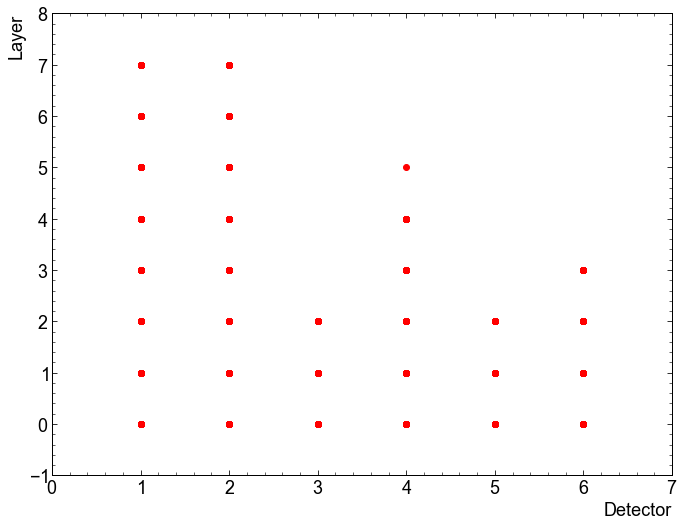

[30.3, 30.3, 30.3, 30.2, 30.2, 30.2, ..., 30.2, 30.4, 30.8, 30.4, 30.3, 30.2]


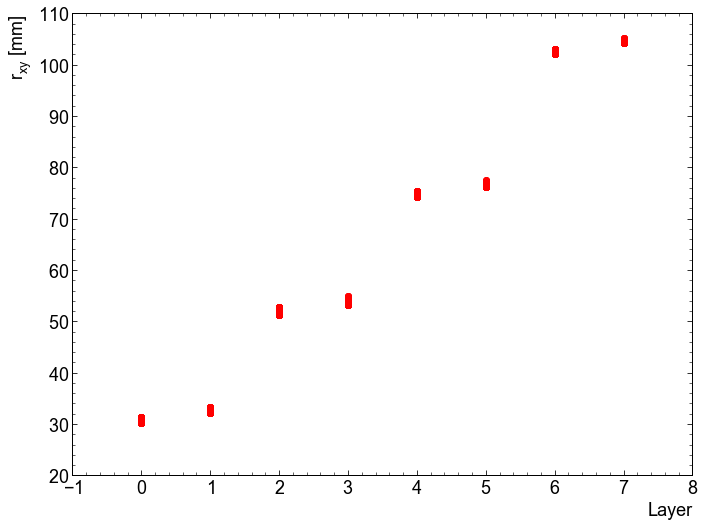

In [8]:
plt.plot(ak.flatten((hit_detector)), ak.flatten(hit_layer), 'ro')
plt.xlabel('Detector', loc = 'right')
plt.ylabel('Layer', loc = 'top')
plt.show()
which_data = run_14_bib

r_xy = ak.flatten(np.sqrt((which_data['x'])[(which_data['hit_detector']) == 1]**2 + (which_data['y'])[(which_data['hit_detector']) == 1]**2))
print(r_xy)

plt.plot(ak.flatten((which_data['hit_layer'])[(which_data['hit_detector']) == 1]), (r_xy), 'ro')
#plt.ylim(0,100)
plt.xlabel('Layer', loc = 'right')
plt.ylabel('$r_{xy}$ [mm]', loc = 'top')
plt.show()

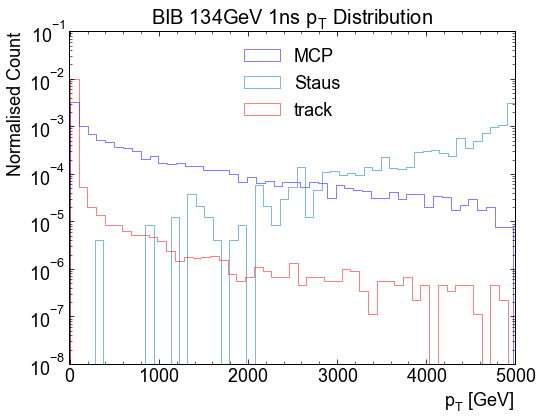

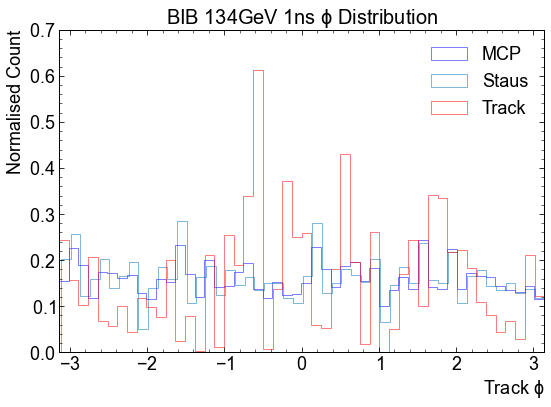

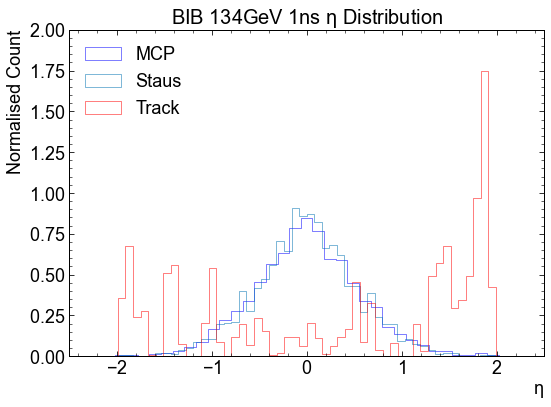

In [9]:
plt.figure(figsize=(8,6))
plt.hist(ak.flatten(bib_134_1['mcp_pt'][bib_134_1['status'] == 1]), bins=50, label = "MCP", color='blue', histtype = 'step', density = True)
plt.hist(ak.flatten(bib_134_1['mcp_pt'][np.abs(bib_134_1['pdgid']) == 1000015]), bins=50, label = "Staus", histtype = 'step', density = True)
plt.hist(ak.flatten(bib_134_1['track_pt'][bib_134_1['track_pt']<5000]), bins=50, label = "track", color='red',  histtype = 'step', density = True)
plt.xlim(-10,5000)
plt.xlabel('$p_T$ [GeV]', loc = 'right')
plt.ylabel('Normalised Count', loc = 'top')
plt.title('BIB 134GeV 1ns $p_T$ Distribution')
plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))

# Histogram for track phi
plt.hist(ak.flatten(bib_134_1['mcp_phi'][bib_134_1['status'] == 1]), bins=50, histtype='step', density = True, color='blue', label='MCP')
plt.hist(ak.flatten(bib_134_1['mcp_phi'][np.abs(bib_134_1['pdgid']) == 1000015]), bins=50, label = "Staus", histtype = 'step', density = True)
plt.hist(ak.flatten(bib_134_1['phi_match']), bins=50, histtype='step', density = True, color='red', label='Track')
plt.xlim(-np.pi,np.pi)
plt.xlabel(r'Track $\phi$', loc = 'right')
plt.ylabel('Normalised Count', loc = 'top')
plt.title(r'BIB 134GeV 1ns $\phi$ Distribution')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))

# Histogram for track eta
plt.hist(ak.flatten(bib_134_1['mcp_eta'][bib_134_1['status'] == 1]), bins=(np.linspace(-3,3,50)), histtype='step', density = True, color='blue', label='MCP')
plt.hist(ak.flatten(bib_134_1['mcp_eta'][np.abs(bib_134_1['pdgid']) == 1000015]), bins=50, label = "Staus", histtype = 'step', density = True)
plt.hist(ak.flatten(bib_134_1['track_eta']), bins=50, histtype='step', density = True, color='red', label='Track')
plt.xlim(-2.5,2.5)
plt.xlabel(r'$\eta$', loc = 'right')
plt.ylabel('Normalised Count', loc = 'top')
plt.title(r'BIB 134GeV 1ns $\eta$ Distribution')
plt.legend()

plt.tight_layout()
plt.show()

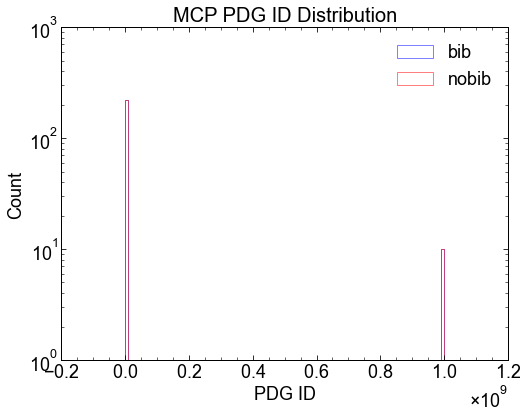

In [10]:
plt.figure(figsize=(8,6))
plt.hist(ak.flatten(bib['pdgid']), bins=100, label = "bib", color='blue', histtype = 'step')
plt.hist(ak.flatten(nobib['pdgid']), bins=100, label = "nobib", color='red',  histtype = 'step')
#plt.xlim(0,1000)
plt.xlabel('PDG ID')
plt.ylabel('Count')
plt.title('MCP PDG ID Distribution')
plt.yscale('log')
#plt.xscale('log')
plt.legend()

### Plotting Functions

In [25]:
##############################################################################################################################################################################################################################
# 2D Histogram plotting function
def plot2DHistogram(datax, datay, bins=100, weights = None, norm="log", label="", xlim = None, ylim = None, stats = False):
    """
    Plot a 2D histogram.

    Parameters:
        datax (numpy.ndarray): x-data array.
        datay (numpy.ndarray): y-data array.
        bins (int, optional): Number of bins for the 2D histogram. Default is 100.
        weights (numpy.ndarray, optional): Weights for the histogram. Default is None.
        norm (str, optional): Normalization for the color map. Default is "log".
        label (str, optional): Plot labels (title, xlabel, ylabel), split by semicolons. Default is an empty string.
        xlim (tuple, optional): X-axis limits. Default is None.
        ylim (tuple, optional): Y-axis limits. Default is None.
        stats (bool, optional): Display statistics. Default is False.
    """
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    
    if weights is not None:
        values = np.array(np.ravel(weights)).T
    else:
        values = None

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)

    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, weights = values, norm=norm, cmap="viridis")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, loc = 'right', fontsize=18)
    ax.set_ylabel(ylabel, loc = 'top', fontsize=18)
    if xlim is not None:
        ax.set_xlim(xlim[0], xlim[1])
    if ylim is not None:
        ax.set_ylim(ylim[0], ylim[1])

    if stats == True:
        # Calculate statistics
        num_entries = len(data_flatx)
        mean_x = np.mean(data_flatx)
        mean_y = np.mean(data_flaty)
        std_x = np.std(data_flatx)
        std_y = np.std(data_flaty)
        # Calculate FWHM of datay
        #fwhm_value = fwhm(data_flaty, bins = np.linspace(np.min(data_flaty), np.max(data_flaty), bins[1]))
        
        # Create a text box to display statistics
        # stats_text = 'FWHM '+ylabel+f':{fwhm_value:.3f}'#"Entries: {num_entries}\nMean x: {mean_x:.2f}\nMean y: {mean_y:.2f}\nStd Dev x: {std_x:.2f}\nStd Dev y: {std_y:.2f}"
        # ax.text(0.5, 0.98, stats_text, transform=ax.transAxes, va='top', ha='left', bbox=dict(boxstyle='round, pad=0.5', facecolor='white', alpha=0.8), fontsize = 7)

    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel)#, fontsize=6)

    plt.show()

##############################################################################################################################################################################################################################
# 2D Scatter plot function
def plot2Dscatter(datax, datay, label_numbers=None, xlim=None, ylim=None, labels=""):
    """
    Plot a scatter plot with the option to label each data point with numbers.

    Parameters:
        data_x (numpy.ndarray): x-data array.
        data_y (numpy.ndarray): y-data array.
        label_numbers (numpy.ndarray, optional): Array of numbers for labeling each data point. Default is None.
        xlim (tuple, optional): X-axis limits. Default is None.
        ylim (tuple, optional): Y-axis limits. Default is None.
        labels (str, optional): Plot labels (title, xlabel, ylabel), split by semicolons. Default is an empty string.
        show_stats (bool, optional): Display statistics. Default is False.
    """
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    
    if label_numbers is not None:
        label_numbers = np.array(np.ravel(label_numbers)).T
    else:
        values = None

    fig, ax = plt.subplots(figsize=(4.5, 3))

    scatter = ax.scatter(data_flatx, data_flaty, c='blue', s=20)

    title = "" if len(labels.split(";")) < 1 else labels.split(";")[0]
    x_label = "" if len(labels.split(";")) < 2 else labels.split(";")[1]
    y_label = "" if len(labels.split(";")) < 3 else labels.split(";")[2]

    ax.set_title(title)
    ax.set_xlabel(x_label, loc='right')
    ax.set_ylabel(y_label, loc='top')

    if xlim is not None:
        ax.set_xlim(xlim[0], xlim[1])
    if ylim is not None:
        ax.set_ylim(ylim[0], ylim[1])

    if label_numbers is not None:
        # Annotate each point with its number label
        for num, x, y in zip(label_numbers, data_flatx, data_flaty):
            ax.annotate(str(num), (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
    #plt.legend()
    plt.show()

##############################################################################################################################################################################################################################
# 1D Histogram comparison function
colors = []
def compare1DHistograms(datas,bins,scale='linear',label="",leg=[]):
    """
    Compare multiple 1D histograms.

    Parameters:
        datas (list of numpy.ndarray): List of data arrays to compare.
        bins (int): Number of bins for the histograms.
        scale (str, optional): Y-axis scale. Default is 'linear'.
        label (str, optional): Plot label. Default is an empty string.
        leg (list of str, optional): Legend labels for each data series. Default is an empty list.
    """
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    
    for i,data in enumerate(datas): 
        if len(data) != 0:
            # handle data, there must be a smarter way to do this...
            if type(data[0])==np.int64   : data_flat=data
            elif type(data[0])==np.float32 : data_flat=data
            else : data_flat = ak.flatten(data, axis=None)
            
            ax.hist(data_flat, bins, alpha=1, label=leg[i] if len(leg)>i else "", histtype = 'step')
        else:
            print("No data for histogram",i)
            continue
   
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, loc = 'right', fontsize=18)
    ax.set_ylabel(ylabel,loc = 'top', fontsize=18)
    plt.legend()
    plt.yscale(scale)
    plt.show()

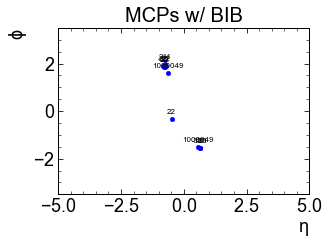

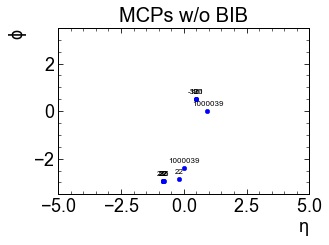

In [12]:

plot2Dscatter((mcp_eta[0][status[0] == 1]), (mcp_phi[0][status[0] == 1]), label_numbers = (pdgid[0][status[0] == 1]), labels=r"MCPs w/ BIB;$\eta$;$\phi$", xlim = (-5,5), ylim = (-3.5,3.5))
plot2Dscatter((nobib['mcp_eta'][0][nobib['status'][0] == 1]), (nobib['mcp_phi'][0][nobib['status'][0] == 1]), label_numbers = (nobib['pdgid'][0][nobib['status'][0] == 1]), labels=r"MCPs w/o BIB;$\eta$;$\phi$", xlim = (-5,5), ylim = (-3.5,3.5))



## Time Studies

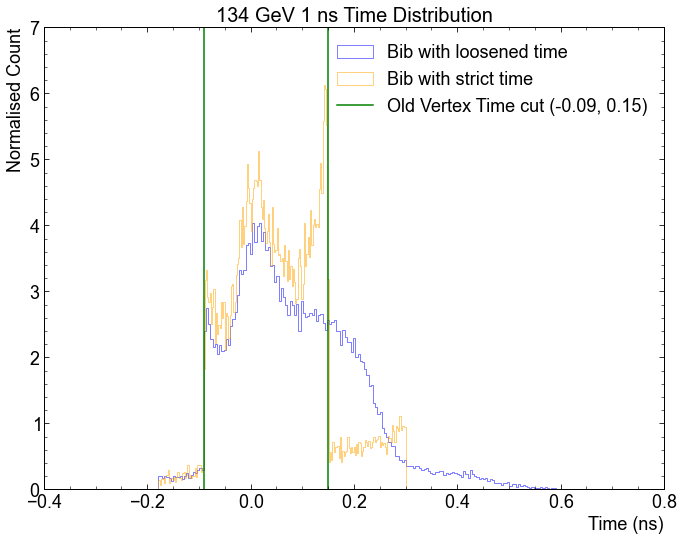

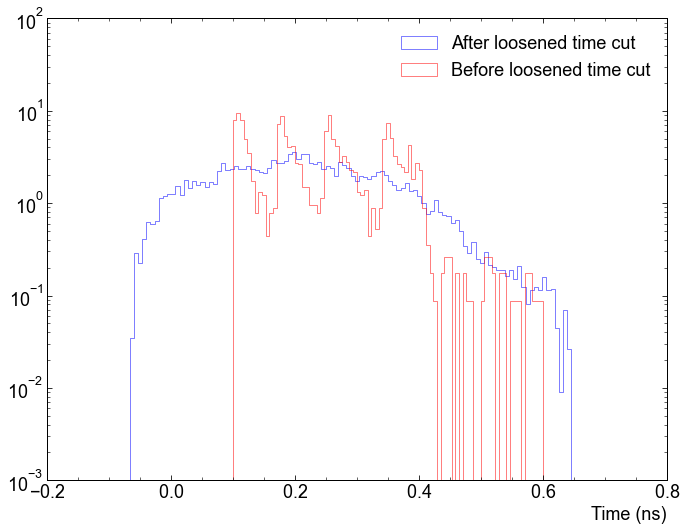

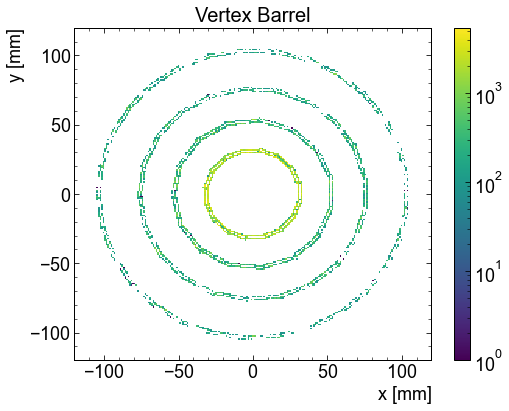

In [13]:
# np.linspace(-1, 10, 120)
plt.hist(ak.flatten(time), bins = 200, histtype = 'step', label = "Bib with loosened time", density=True, color='blue')
plt.hist(ak.flatten(run_14_bib['time']), bins = 200, histtype = 'step', label = "Bib with strict time", density=True, color='orange')
plt.axvline(x=(-0.09), color = 'green')
plt.axvline(x=(0.15), color = 'green', label = "Old Vertex Time cut (-0.09, 0.15)")
plt.xlabel("Time (ns)", loc = "right")
plt.ylabel("Normalised Count", loc = "top")
#plt.yscale('log')
plt.title('134 GeV 1 ns Time Distribution')
plt.legend()
plt.show()

plt.hist(ak.flatten(VB_time), bins = np.linspace(-0.1, 0.7, 120), histtype = 'step', label = "After loosened time cut", density=True, color='blue')
plt.hist(ak.flatten(run_14_sim['VB_time']), bins = np.linspace(-0.1, 0.6, 120), histtype = 'step', label = "Before loosened time cut", density=True, color='red')
plt.xlabel("Time (ns)", loc = "right")
plt.yscale('log')
plt.legend()
plt.show()

plot2DHistogram(VB_x, VB_y, bins=200, label="Vertex Barrel;x [mm];y [mm]", xlim = (-120,120), ylim = (-120,120))

## Pointing

In [14]:
# r_scal = ak.flatten(np.sqrt(x**2 + y**2 + z**2))
# r_xyz = ([np.array((a,b,c)) for a,b,c in zip(ak.flatten(x),ak.flatten(y),ak.flatten(z))])
# pointing_angles = np.full((len(r_xyz),len(r_xyz)), np.inf)
# pointing_vectors = np.full((len(r_xyz),len(r_xyz), 3), np.inf)

# for i in range(len(r_xyz)):
#     for j in range(i+1, len(r_xyz)):
#             pointing_angle = (np.arccos(np.clip(np.dot(r_xyz[i], r_xyz[j]) / (r_scal[i] * r_scal[j]), -1.0, 1.0)))
#             pointing_angles[i, j] = pointing_angle
#             pointing_vectors[i,j] = (r_xyz[j] - r_xyz[i])
# #np.set_printoptions(threshold=np.inf) # set to 1000 for default
# print(r_xyz) 
# #print(pointing_angles)
# print(pointing_vectors)
# print(sorted((r_scal)))
# print(len((r_scal)),len(r_xyz))
# plt.hist((r_scal), bins=np.linspace(0,100, 200), histtype = 'step')
# plt.xlim(0,100)
# plt.xlabel('R [mm]')
# plt.show()

In [15]:
print(np.max(nhits), len(nhits[0]), ((x[:])))
tracks = np.split(ak.flatten(x), np.cumsum(ak.flatten(nhits))[:-1])
print(tracks)
print(np.sum(ak.flatten(outer_nhits))/np.sum(ak.flatten(nhits)))

19 150 [[-27.6, -83.8, -314, -25.2, -59.5, -627, ..., 50.8, 223, 9.54, 18, 26.8], ...]
[[-27.6, -83.8, -314], [-25.2, -59.5, -627], ..., [9.53, ...], [9.54, 18, 26.8]]
0.09957850954748163


In [16]:
which_data = run_14_bib
r_xy = np.array([np.array((np.sqrt(a**2 + b**2),c)) for a,b,c in zip(ak.flatten(which_data['x']),ak.flatten(which_data['y']),ak.flatten(which_data['z']))])
r_xy_vb = r_xy[(ak.flatten(which_data['hit_detector']) == 1)] # | (ak.flatten(which_data['hit_detector']) == 2)]
print(len(ak.flatten(r_xy_vb)))
r_xy = np.split(ak.flatten(r_xy), np.cumsum(ak.flatten(which_data['nhits']))[:-1])
print(r_xy)
print(len(ak.flatten(which_data['hit_detector'])), len(ak.flatten(which_data['hit_detector'])[ak.flatten(which_data['hit_detector']) == 1]))
print(which_data['hit_detector'][which_data['hit_detector'] == 1])
hit_l = np.split(ak.flatten(which_data['hit_detector']), np.cumsum(ak.flatten(which_data['nhits']))[:-1])
print(hit_l[hit_l == 1])
r_xy_vb = r_xy[(hit_l == 1) | (hit_l == 0)]
print(len(ak.flatten(r_xy_vb)))

x_tracks = np.split(ak.flatten(x), np.cumsum(ak.flatten(nhits))[:-1])
y_tracks = np.split(ak.flatten(y), np.cumsum(ak.flatten(nhits))[:-1])
z_tracks = np.split(ak.flatten(z), np.cumsum(ak.flatten(nhits))[:-1])
hit_detector_tracks = np.split(ak.flatten(hit_detector), np.cumsum(ak.flatten(nhits))[:-1])

# Filter for hits in the vertex barrel region (hit_detector == 1) for each track
r_xyz_vb_tracks = [np.array((x_t, y_t, z_t)).T[hit_detector_t == 1] for x_t, y_t, z_t, hit_detector_t in zip(x_tracks, y_tracks, z_tracks, hit_detector_tracks)]
print(r_xyz_vb_tracks)
plt.plot((r_xy_vb)[:,1], (r_xy_vb)[:,0], 'ro')
plt.xlabel('z [mm]', loc = 'right')
plt.ylabel(r'$r_{xy}$ [mm]', loc = 'top')
plt.show()# 30, 50 75, 100

22634
[[27.9, -82.2, 85.4], ..., [-286, 30.4, -3.51, 31.3, ..., 55.5, 200, 77.6, 280]]
32814 11317
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], ...]
[[], [], [], [], [], [], [], [], [], ..., [], [], [], [], [], [], [], [], []]
11317
[array([], shape=(0, 3), dtype=float64), array([], shape=(0, 3), dtype=float64), array([], shape=(0, 3), dtype=float64), array([], shape=(0, 3), dtype=float64), array([], shape=(0, 3), dtype=float64), array([], shape=(0, 3), dtype=float64), array([], shape=(0, 3), dtype=float64), array([], shape=(0, 3), dtype=float64), array([], shape=(0, 3), dtype=float64), array([], shape=(0, 3), dtype=float64), array([], shape=(0, 3), dtype=float64), array([], shape=(0, 3), dtype=float64), array([], shape=(0, 3), dtype=float64), array([], shape=(0, 3), dtype=float64), array([], shape=(0, 3), dtype=float64), array([], shape=(0, 3), dtype=float64), array([], shape=(0, 3), dtype=float64), array([], shape=(0, 3), dtype=float64), array([], shape=(

IndexError: cannot slice ListArray (of length 11151) with array(1): index out of range while attempting to get index 1 (in compiled code: https://github.com/scikit-hep/awkward/blob/awkward-cpp-16/awkward-cpp/src/cpu-kernels/awkward_NumpyArray_getitem_next_at.cpp#L21)

This error occurred while attempting to slice

    <Array [[], [], [], [], ..., [], [], [], []] type='11151 * var * float64'>

with

    (:, 1)

In [ ]:
print(len(ak.flatten(hit_detector)), len(ak.flatten(hit_layer)))

269757 269757


Duplicates found in dataset:
39869


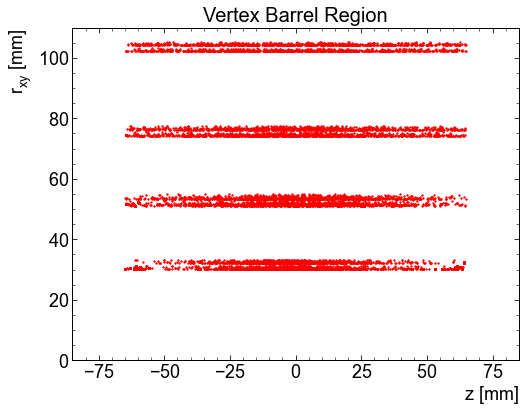

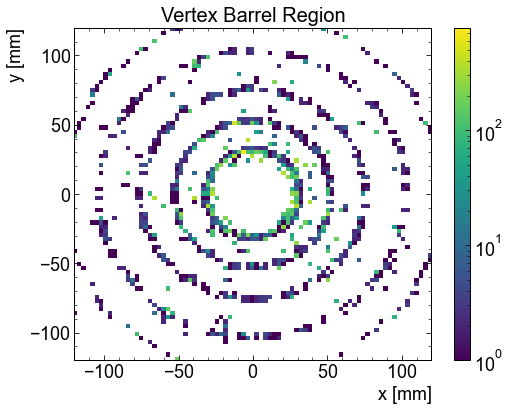

In [17]:
which_data = bib_134_1
r_xy = np.array([np.array((np.sqrt(a**2 + b**2),c)) for a,b,c in zip(ak.flatten(which_data['x']),ak.flatten(which_data['y']),ak.flatten(which_data['z']))])
r_xy_vb = r_xy[(ak.flatten(which_data['hit_detector']) == 1)] # | (ak.flatten(which_data['hit_detector']) == 2)]
r_xyz = np.array([np.array((a,b,c)) for a,b,c in zip(ak.flatten(which_data['x']),ak.flatten(which_data['y']),ak.flatten(which_data['z']))])
r_xyz_vb = r_xyz[(ak.flatten(which_data['hit_detector']) == 1)] # | (ak.flatten(which_data['hit_detector']) == 2)]

# Find unique rows in r_xyz_vb
unique_rows, unique_indices = np.unique(r_xyz_vb, axis=0, return_index=True)

# Check if the number of unique rows is less than the total number of rows
if len(unique_rows) < len(r_xyz_vb):
    print("Duplicates found in dataset:")
    
    # Find duplicate indices
    duplicate_indices = np.setdiff1d(np.arange(len(r_xyz_vb)), unique_indices)
    
    # Print duplicate rows
    # for idx in duplicate_indices:
    #     print(idx, r_xyz_vb[idx])
else:
    print("No duplicates found in dataset.")
print(len(duplicate_indices))
r_xyz_vb = r_xyz_vb[unique_indices]
r_xy_vb = r_xy_vb[unique_indices]

#print(len(r_xy_vb)/len(r_xy))
#print(r_xy_vb)
#print("Differences in r_xy doublet pairs for stau_events run_14_nobib:", 32.88601564-30.79344847, 53.21614373-51.16611994, 32.45179385-30.38614163, 53.45383027- 51.39499783,76.48985332-74.43273059, 104.55215984-102.49664215)

fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(projection='3d')
limit = 85
limits = (-limit,limit)
#plt.scatter(ak.flatten(x),ak.flatten(y), label = 'bib', color = 'r', s = 3)
#plt.scatter(ak.flatten(run_14_nobib['x']),ak.flatten(run_14_nobib['y']), label = 'run_14_nobib', color = 'b', s = 15)
plt.scatter((r_xy_vb)[:,1], (r_xy_vb)[:,0], label = 'run_14_bib', color = 'r', s = 3)
plt.xlim(limits)
plt.ylim(0, 110)
plt.xlabel('z [mm]', loc = 'right')
plt.ylabel(r'$r_{xy}$ [mm]', loc = 'top')
plt.title('Vertex Barrel Region')
#plt.legend()
plt.show()

plot2DHistogram((run_14_bib['x']), (run_14_bib['y']), bins=1000, label="Vertex Barrel Region;x [mm];y [mm]", xlim = (-120,120), ylim = (-120,120))

### New Method

In [ ]:
vertex_layer = (ak.flatten(which_data['hit_layer'][(which_data['hit_detector'] == 1)])[unique_indices])
print(len(vertex_layer))
print(max(vertex_layer), min(vertex_layer))
print(len((r_xy_vb)))

42603
7 0
42603


In [ ]:
z_tolerance = 1  # mm

doublet_pairs_xyz = []
doublet_pairs_rz = []

num_hits = 5000 # 10000 takes < 1 min, 20000 takes ~4 mins

vertex_layer = ak.flatten(which_data['hit_layer'][(which_data['hit_detector'] == 1)])[unique_indices][:num_hits]

r_xyz_vb_reduced = r_xyz_vb[:num_hits]
r_xy_vb_reduced = r_xy_vb[:num_hits]


for layer in range(0, max(vertex_layer), 2):  
    # Identify hits in the current and next layer
    hits_current_layer = r_xyz_vb_reduced[vertex_layer == layer]
    hits_next_layer = r_xyz_vb_reduced[vertex_layer == layer + 1]
    
    # For each hit in the current layer, find a hit in the next layer within z_tolerance
    for i, hit1 in enumerate(hits_current_layer):
        #print(i, hit1)
        # Calculate the z-distance between hit1 and all hits in the next layer
        z_distances = np.abs(hit1[2] - hits_next_layer[:, 2])
        
        # Find indices of hits in the next layer within the z_tolerance
        within_tolerance = np.where(z_distances < z_tolerance)[0]
        
        # Pair hit1 with all hits within tolerance
        for j in within_tolerance:
            hit2 = hits_next_layer[j]
            doublet_pairs_xyz.append([hit1, hit2])
            # Assuming r_xy_vb_reduced is structured similarly to r_xyz_vb_reduced, index with the same logic
            doublet_pairs_rz.append([r_xy_vb_reduced[vertex_layer == layer][i], r_xy_vb_reduced[vertex_layer == layer + 1][j]])

# Convert lists to arrays for further processing if necessary
doublet_pairs_xyz = np.array(doublet_pairs_xyz)
doublet_pairs_rz = np.array(doublet_pairs_rz)
np.set_printoptions(threshold=np.inf) # set to 1000 for default

print(f"Total pairs found from {num_hits} hits: {len(doublet_pairs_xyz)}")
#print(doublet_pairs_rz)


Total pairs found from 5000 hits: 14231


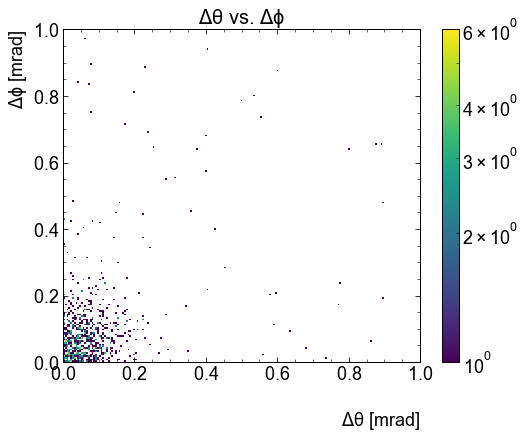

The hit survival rate: 0.182


: 

In [ ]:
# Define a function to compute the cylindrical coordinates (phi) of a vector
def xy_to_phi(x, y):
    return np.arctan2(y, x)

# Define a function to compute the longitudinal angle (theta) between a vector and the z-axis
def xyz_to_theta(x, y, z):
    return np.arctan2(np.sqrt(x**2 + y**2), z)

# Define a function to compute the angular difference between two angles (in radians) with cylindrical symmetry
def angular_difference(angle1, angle2):
    diff = np.abs(angle1 - angle2)
    # Adjust the difference to be within the range [-pi, pi)
    # diff = (diff + np.pi) % (2 * np.pi) - np.pi
    return np.abs(diff)

# Define maximum tolerated angles (in radians, adjust as needed)
max_theta_tolerance = 3e-3
max_phi_tolerance = 35e-3

d_theta_d_phi = []

# Iterate over each pair of hits in doublet_pairs_xyz
for pair in doublet_pairs_xyz:
    # Extract the Cartesian coordinates of the two hits
    hit1_xyz, hit2_xyz = pair
    
    # Compute the longitudinal angle (theta) and cylindrical coordinate (phi) for each hit
    theta1 = xyz_to_theta(*hit1_xyz)
    theta2 = xyz_to_theta(*hit2_xyz)
    phi1 = xy_to_phi(hit1_xyz[0], hit1_xyz[1])
    phi2 = xy_to_phi(hit2_xyz[0], hit2_xyz[1])
    
    # Compute the angular differences
    d_theta = angular_difference(theta1, theta2)
    d_phi = angular_difference(phi1, phi2)
    
    # Filter based on the maximum tolerated angles
    if d_theta <= max_theta_tolerance and d_phi <= max_phi_tolerance:
        d_theta_d_phi.append(np.array([d_theta, d_phi]))

d_theta_d_phi = np.array(d_theta_d_phi)

# Plot the results with specified parameters
plot2DHistogram(d_theta_d_phi[:,0]*1000, d_theta_d_phi[:,1]*1000, bins=np.linspace(0,1,200), label="$\Delta \\theta$ vs. $\Delta \phi$; \n  $\Delta \\theta$ [mrad];$\Delta \phi$ [mrad]")
print(f"The hit survival rate: {len(d_theta_d_phi)/len(r_xyz_vb_reduced)}")


### Import d_theta_d_phi

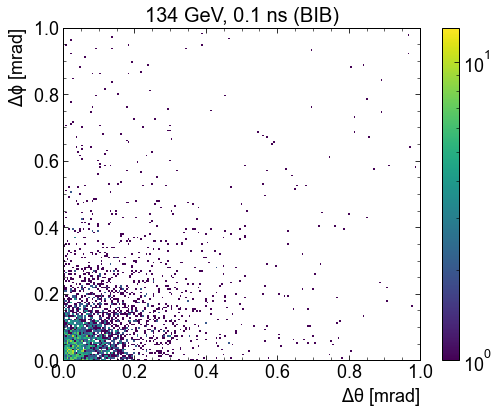

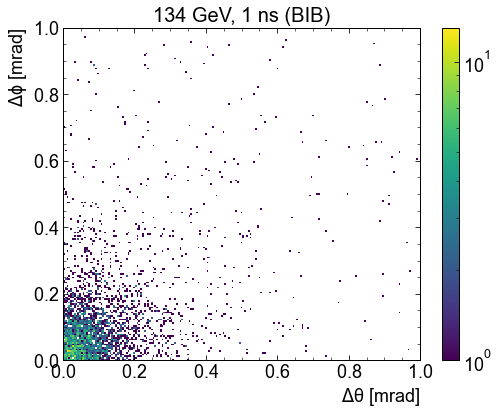

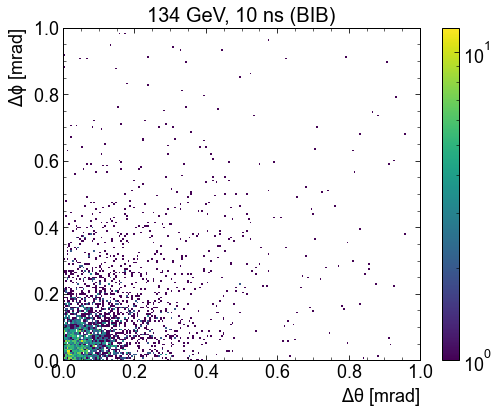

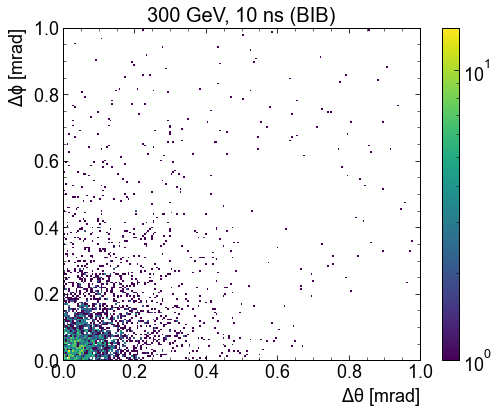

In [32]:
d_theta_d_phi_134_01_bib = np.load(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\134_0.1_d_theta_d_phi_bib.npy")
d_theta_d_phi_134_1_bib = np.load(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\134_1_d_theta_d_phi_bib.npy")
d_theta_d_phi_134_10_bib = np.load(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\134_10_d_theta_d_phi_bib.npy")
d_theta_d_phi_300_10_bib = np.load(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\300_10_d_theta_d_phi_bib.npy")
d_theta_d_phi_134_01 = np.load(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\134_0.1_d_theta_d_phi.npy")
d_theta_d_phi_134_1 = np.load(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\134_1_d_theta_d_phi.npy")
d_theta_d_phi_134_10 = np.load(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\134_10_d_theta_d_phi.npy")
d_theta_d_phi_300_10 = np.load(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\LLPs_data\300_10_d_theta_d_phi.npy")
bib_title_134_01 = "134 GeV, 0.1 ns (BIB)"
bib_title_134_1 = "134 GeV, 1 ns (BIB)"
bib_title_134_10 = "134 GeV, 10 ns (BIB)"
bib_title_300_10 = "300 GeV, 10 ns (BIB)"
title_134_01 = "134 GeV, 0.1 ns"
title_134_1 = "134 GeV, 1 ns"
title_134_10 = "134 GeV, 10 ns"
title_300_10 = "300 GeV, 10 ns"
# print(len(d_theta_d_phi_134_01_bib), len(d_theta_d_phi_134_1_bib), len(d_theta_d_phi_134_1_bib0), len(d_theta_d_phi_300_10_bib))
plot2DHistogram(d_theta_d_phi_134_01_bib[:,0]*1000, d_theta_d_phi_134_01_bib[:,1]*1000, bins=np.linspace(0,1,200), label=f"{bib_title_134_01}; $\Delta \\theta$ [mrad];$\Delta \phi$ [mrad]")
plot2DHistogram(d_theta_d_phi_134_1_bib[:,0]*1000, d_theta_d_phi_134_1_bib[:,1]*1000, bins=np.linspace(0,1,200), label=f"{bib_title_134_1}; $\Delta \\theta$ [mrad];$\Delta \phi$ [mrad]")
plot2DHistogram(d_theta_d_phi_134_10_bib[:,0]*1000, d_theta_d_phi_134_10_bib[:,1]*1000, bins=np.linspace(0,1,200), label=f"{bib_title_134_10}; $\Delta \\theta$ [mrad];$\Delta \phi$ [mrad]")
plot2DHistogram(d_theta_d_phi_300_10_bib[:,0]*1000, d_theta_d_phi_300_10_bib[:,1]*1000, bins=np.linspace(0,1,200), label=f"{bib_title_300_10}; $\Delta \\theta$ [mrad];$\Delta \phi$ [mrad]")


### BIB

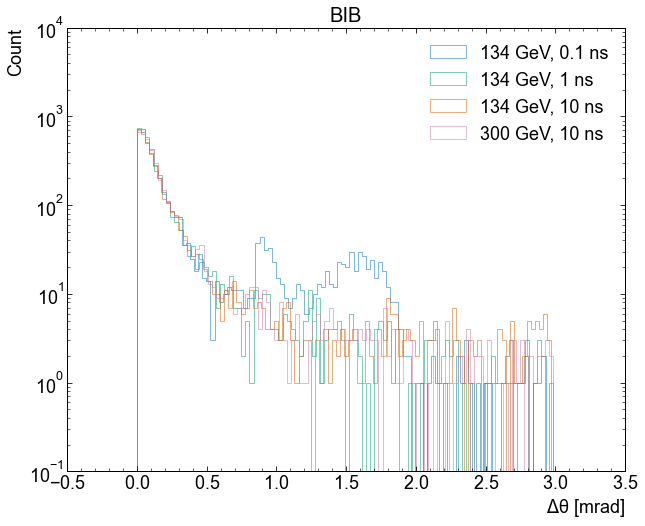

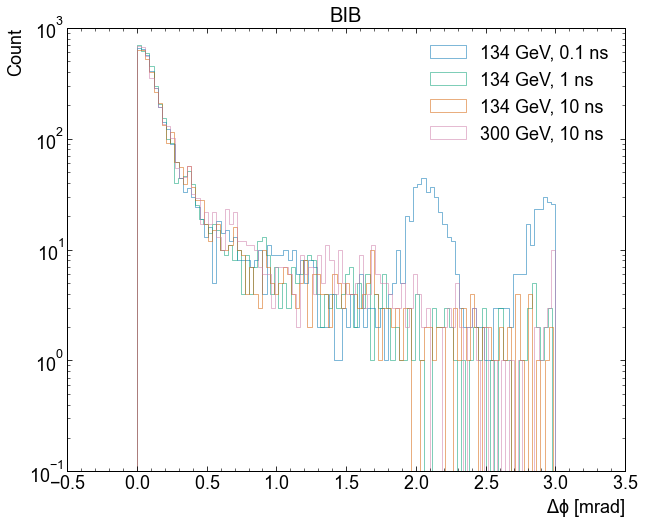

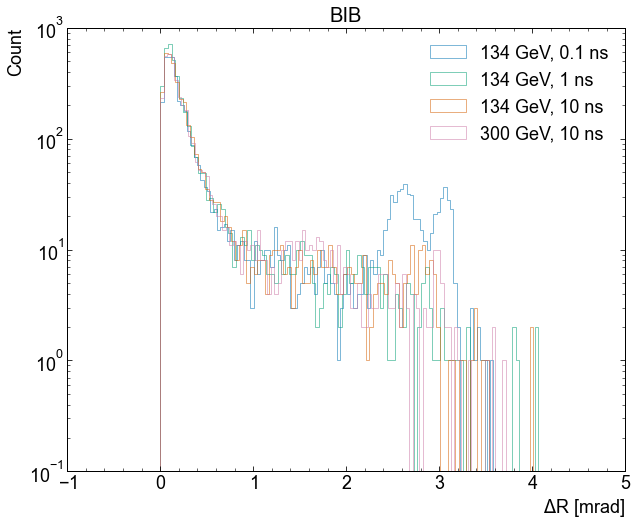

In [30]:
compare1DHistograms([d_theta_d_phi_134_01_bib[:,0]*1000, d_theta_d_phi_134_1_bib[:,0]*1000, d_theta_d_phi_134_10_bib[:,0]*1000, d_theta_d_phi_300_10_bib[:,0]*1000], bins=100, scale='log', label="BIB; $\Delta \\theta$ [mrad];Count", leg=[title_134_01, title_134_1, title_134_10, title_300_10])
compare1DHistograms([d_theta_d_phi_134_01_bib[:,1]*1000, d_theta_d_phi_134_1_bib[:,1]*1000, d_theta_d_phi_134_10_bib[:,1]*1000, d_theta_d_phi_300_10_bib[:,1]*1000], bins=100, scale='log', label="BIB; $\Delta \phi$ [mrad];Count", leg=[title_134_01, title_134_1, title_134_10, title_300_10])
dr_134_01_bib = np.sqrt((d_theta_d_phi_134_01_bib[:,0]*1000)**2 + (d_theta_d_phi_134_01_bib[:,1]*1000)**2)
dr_134_1_bib = np.sqrt((d_theta_d_phi_134_1_bib[:,0]*1000)**2 + (d_theta_d_phi_134_1_bib[:,1]*1000)**2)
dr_134_10_bib = np.sqrt((d_theta_d_phi_134_10_bib[:,0]*1000)**2 + (d_theta_d_phi_134_10_bib[:,1]*1000)**2)
dr_300_10_bib = np.sqrt((d_theta_d_phi_300_10_bib[:,0]*1000)**2 + (d_theta_d_phi_300_10_bib[:,1]*1000)**2)
compare1DHistograms([dr_134_01_bib, dr_134_1_bib, dr_134_10_bib, dr_300_10_bib], bins=100, scale='log', label="BIB; $\Delta R$ [mrad];Count", leg=[title_134_01, title_134_1, title_134_10, title_300_10])

### No BIB

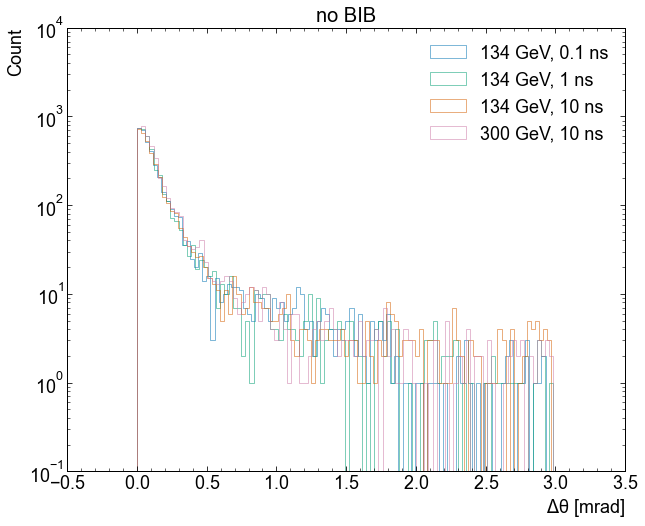

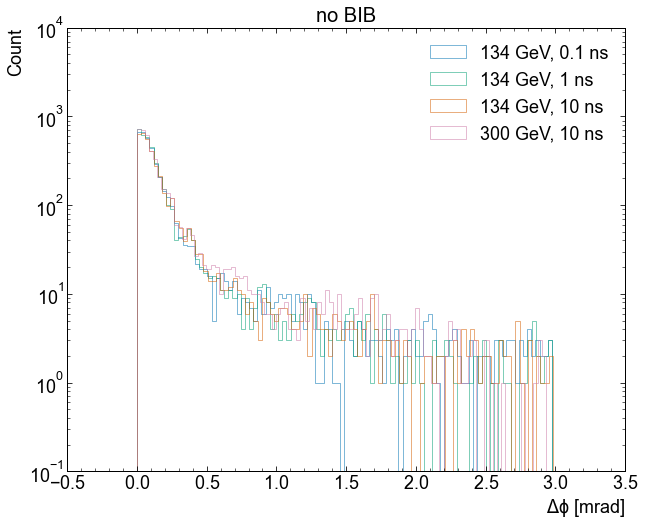

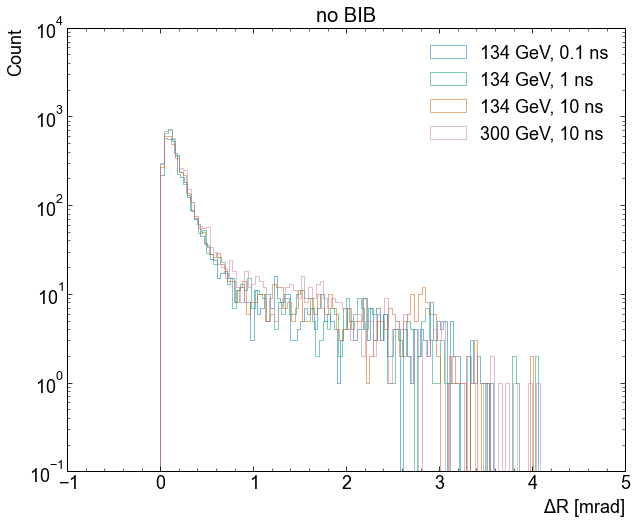

In [33]:
compare1DHistograms([d_theta_d_phi_134_01[:,0]*1000, d_theta_d_phi_134_1[:,0]*1000, d_theta_d_phi_134_10[:,0]*1000, d_theta_d_phi_300_10[:,0]*1000], bins=100, scale='log', label="no BIB; $\Delta \\theta$ [mrad];Count", leg=[title_134_01, title_134_1, title_134_10, title_300_10])
compare1DHistograms([d_theta_d_phi_134_01[:,1]*1000, d_theta_d_phi_134_1[:,1]*1000, d_theta_d_phi_134_10[:,1]*1000, d_theta_d_phi_300_10[:,1]*1000], bins=100, scale='log', label="no BIB; $\Delta \phi$ [mrad];Count", leg=[title_134_01, title_134_1, title_134_10, title_300_10])
dr_134_01 = np.sqrt((d_theta_d_phi_134_01[:,0]*1000)**2 + (d_theta_d_phi_134_01[:,1]*1000)**2)
dr_134_1 = np.sqrt((d_theta_d_phi_134_1[:,0]*1000)**2 + (d_theta_d_phi_134_1[:,1]*1000)**2)
dr_134_10 = np.sqrt((d_theta_d_phi_134_10[:,0]*1000)**2 + (d_theta_d_phi_134_10[:,1]*1000)**2)
dr_300_10 = np.sqrt((d_theta_d_phi_300_10[:,0]*1000)**2 + (d_theta_d_phi_300_10[:,1]*1000)**2)
compare1DHistograms([dr_134_01, dr_134_1, dr_134_10, dr_300_10], bins=100, scale='log', label="no BIB; $\Delta R$ [mrad];Count", leg=[title_134_01, title_134_1, title_134_10, title_300_10])

### Old Method

In [ ]:
# Define the radii of the doublet layers
doublet_radii = [30, 51, 74, 102]  # mm

# Define the tolerance for proximity in r_xy and z dimensions
layer_separation = 3  # mm
xyz_tolerance = 3 # mm
separation_tolerance = 0.05 # mm

# Initialize a list to store pairs of hits for each doublet layer
doublet_pairs_xyz = []
doublet_pairs_rz = []

# Iterate over each doublet layer
for radius_index in range(len(doublet_radii)):
    # Compute the inner and outer radii of the doublet layer
    inner_radius = doublet_radii[radius_index]
    outer_radius = doublet_radii[radius_index] + layer_separation  # Considering layers approximately 2mm apart

    # Filter hits within the current doublet layer in r_xy
    hits_within_doublet_r_xy = r_xy_vb[(r_xy_vb[:,0] >= inner_radius) & (r_xy_vb[:,0] < outer_radius)]
    hits_within_doublet_r_xyz = r_xyz_vb[(r_xy_vb[:,0] >= inner_radius) & (r_xy_vb[:,0] < outer_radius)]
    #print(hits_within_doublet_r_xy)

    # Find pairs of hits that satisfy the doublet condition in r_xy
    pairs_rz = []
    pairs_xyz = []
    for i, hit1 in enumerate(hits_within_doublet_r_xy):
        for j in range(i+1, len(hits_within_doublet_r_xy)):
            hit2 = hits_within_doublet_r_xy[j]
            if np.abs(np.abs(hit1[0] - hit2[0]) - 2.07) < separation_tolerance:
                # print(i, hits_within_doublet_r_xyz[i], j, hits_within_doublet_r_xyz[j])
                pairs_rz.append(np.array([hit1, hit2]))
                pairs_xyz.append(np.array([hits_within_doublet_r_xyz[i], hits_within_doublet_r_xyz[j]]))
                # print((hit1[1],hit2[1]),(hits_within_doublet_r_xy[i][1], hits_within_doublet_r_xy[j][1]), (hits_within_doublet_r_xyz[i][2], hits_within_doublet_r_xyz[j][2]))
    # print(pairs_rz)
    # print(pairs_xyz)
    # print(appended_pairs)    
    # print(hits_within_doublet_r_xyz[3], hits_within_doublet_r_xyz[7], hits_within_doublet_r_xyz[17], hits_within_doublet_r_xyz[21], hits_within_doublet_r_xyz[19])
    
    # Check proximity in x,y,z dimension for pairs of hits
    for i, pair in enumerate(pairs_xyz):
        if (abs(pair[0,0] - pair[1,0]) < xyz_tolerance) and (np.abs(pair[0,1] - pair[1,1]) < xyz_tolerance) and np.abs(pair[0,2] - pair[1,2]) < xyz_tolerance:
            doublet_pairs_xyz.append(pairs_xyz[i])
            doublet_pairs_rz.append(pairs_rz[i])
            # print(i, pairs_xyz[i])
print(len(doublet_pairs_xyz))
#print(doublet_pairs_rz)

# NB: GETTING DUPES BUT IT SEEMS THERE ARE HITS USED FOR MULTIPLE TRACKS

881


In [ ]:
print(np.ravel(np.array(doublet_pairs_rz)))
dp_rz = np.ravel(np.array(doublet_pairs_rz))
print((dp_rz)[1::2])
print((dp_rz)[::2])

[ 32.97813734  -5.26272265  30.88093928 ...  47.66421546 104.93794228
  48.62337371]
[ -5.26272265  -4.94565826 -36.52825896 ...  48.44121584  47.66421546
  48.62337371]
[ 32.97813734  30.88093928  32.9019042  ... 104.91296615 102.87430433
 104.93794228]


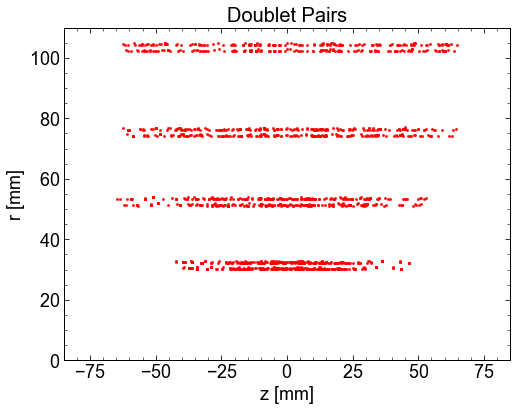

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.scatter(dp_rz[1::2], dp_rz[::2], label = 'Doublet Pairs', color = 'r', s = 5)
plt.xlabel('z [mm]')
plt.ylabel('r [mm]')
plt.title('Doublet Pairs')
plt.xlim(-85,85)
plt.ylim(0,110)
plt.show()

3951
[[0.06007536 4.51610101]
 [0.06077132 1.87526565]]


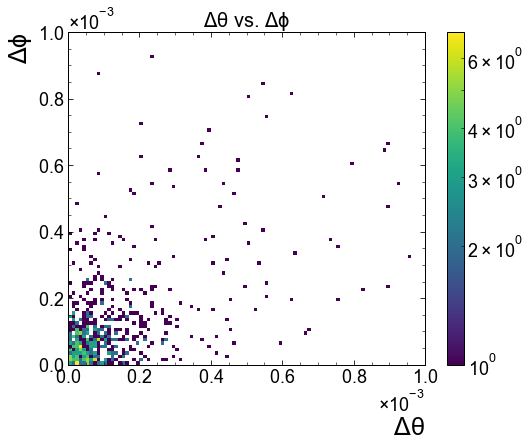

In [ ]:
# Define a function to compute the cylindrical coordinates (phi) of a vector
def xy_to_phi(x, y):
    return np.arctan2(y, x)

# Define a function to compute the longitudinal angle (theta) between a vector and the z-axis
def xyz_to_theta(x, y, z):
    return np.arctan2(np.sqrt(x**2 + y**2), z)

# Define a function to compute the angular difference between two angles (in radians) with cylindrical symmetry
def angular_difference(angle1, angle2):
    diff = np.abs(angle1 - angle2)
    # Adjust the difference to be within the range [-pi, pi)
    # diff = (diff + np.pi) % (2 * np.pi) - np.pi
    return np.abs(diff)

d_theta_d_phi = []

# Iterate over each pair of hits in doublet_pairs_xyz
for pair in doublet_pairs_xyz:
    # Extract the Cartesian coordinates of the two hits
    hit1_xyz, hit2_xyz = pair
    
    # Compute the longitudinal angle (theta) for each hit
    theta1 = xyz_to_theta(*hit1_xyz)
    theta2 = xyz_to_theta(*hit2_xyz)
    
    # Compute the cylindrical coordinates (phi) for each hit
    phi1 = xy_to_phi(hit1_xyz[0], hit1_xyz[1])
    phi2 = xy_to_phi(hit2_xyz[0], hit2_xyz[1])
    
    # Compute the angular difference in theta (Delta theta)
    Delta_theta = angular_difference(theta1, theta2)
    
    # Compute the angular difference in phi (Delta phi)
    Delta_phi = angular_difference(phi1, phi2)
    
    # Append the computed values to the list
    d_theta_d_phi.append(np.array([Delta_theta, Delta_phi]))

    # Print or store the computed values
    # print("Delta Theta:", Delta_theta)
    # print("Delta Phi:", Delta_phi)
d_theta_d_phi = np.array(d_theta_d_phi)
# for i, pair in enumerate(d_theta_d_phi):
#     print(d_theta_d_phi[i], "\n", doublet_pairs_xyz[i])#, doublet_pairs_rz[i])
print(len(d_theta_d_phi))
print(d_theta_d_phi[d_theta_d_phi[:,0] > 0.06])
plot2DHistogram(d_theta_d_phi[:,0], d_theta_d_phi[:,1], bins=np.linspace(0,0.01,1000), label="$\Delta \\theta$ vs. $\Delta \phi$; \n  $\Delta \\theta$;$\Delta \phi$", xlim = (0,0.001), ylim = (0,0.001))

In [ ]:
print(len(ak.flatten(bib['track_pt'])), len(ak.flatten(nobib['track_pt'])), len(ak.flatten(nobib['mcp_pt'])))

27 2 232


In [ ]:
print(len(ak.flatten(pdgid)))
print(ak.flatten(time[np.abs(pdgid) == 1000015]))

232
[0.0303, 0.0837, 0.0889, 0.129]


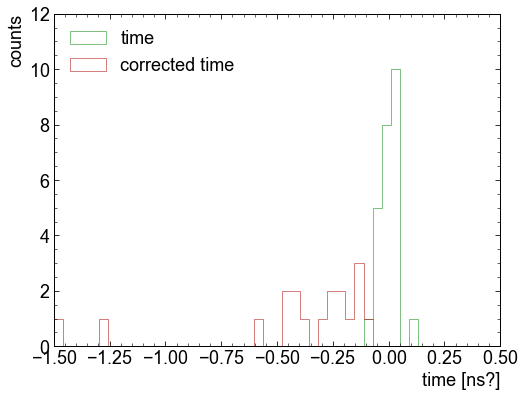

In [ ]:
fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(projection='3d')
limits = (-1.5,0.5)
plt.hist(ak.flatten(nobib['time']), bins = np.linspace(limits[0],limits[1], 50), label = "time", histtype = 'step')
plt.hist(ak.flatten(nobib['corrected_time']), bins = np.linspace(limits[0],limits[1], 50), label = "corrected time", histtype = 'step')
plt.xlim(limits)
#plt.ylim(limits)
plt.xlabel('time [ns?]', loc = 'right')
plt.ylabel('counts', loc = 'top')
plt.legend()
plt.show()

### Plot 2D Hists of $\eta$ vs $\phi$

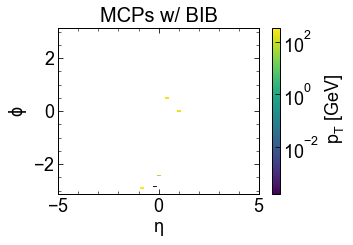

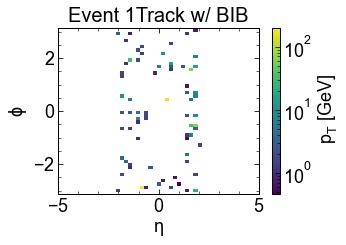

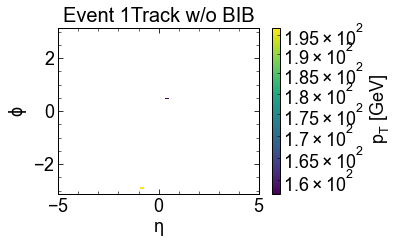

In [ ]:
pt_250_1000 = [250,1000]
plot2DHistogram((mcp_eta[status == 1]), (mcp_phi[status == 1]), bins=(np.linspace(-5,5,50),50), weights = (mcp_pt[status == 1]), label=r"MCPs w/ BIB;$\eta$;$\phi$; $p_T$ [GeV]", xlim = (-5,5), ylim = (-3.14,3.14))

i = 0
while i < len(track_eta):
    plot2DHistogram((track_eta[i]), (phi_match[i]), bins=(np.linspace(-5,5,50),50 ), weights = (track_pt[i]), label=r"Event " + str(i+1) + r"Track w/ BIB;$\eta$;$\phi$; $p_T$ [GeV]", xlim = (-5,5), ylim = (-3.14,3.14))
    plot2DHistogram((nobib['track_eta'][i]), (nobib['phi_match'][i]), bins=(np.linspace(-5,5,50),50 ), weights = (nobib['track_pt'][i]), label=r"Event " + str(i+1) + r"Track w/o BIB;$\eta$;$\phi$; $p_T$ [GeV]", xlim = (-5,5), ylim = (-3.14,3.14))
    i+=1



### Misc. Studies

In [ ]:
print(len(ak.flatten(bib['track_pt'][bib['track_pt']<20]))/len(ak.flatten(bib['track_pt'])))
print(len(ak.flatten(nobib['track_pt'][nobib['track_pt']<20]))/len(ak.flatten(nobib['track_pt'])))

0.9259259259259259
0.0


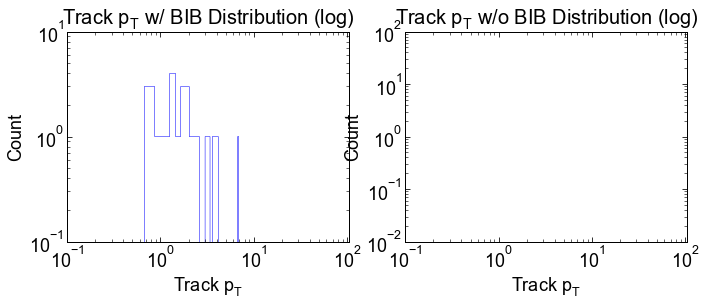

In [ ]:
# Histogram for track pt
plt.subplot(2, 2, 1)
plt.hist(ak.flatten(bib['track_pt']), bins=1000, color='blue', histtype = 'step')
plt.xlim(0.1,105)
plt.xlabel('Track $p_T$')
plt.ylabel('Count')
plt.title('Track $p_T$ w/ BIB Distribution (log)')
plt.yscale('log')
plt.xscale('log')


plt.subplot(2, 2, 2)
plt.hist(ak.flatten(nobib['track_pt']), bins=1000, color='blue', histtype = 'step')
plt.xlim(0.1,105)
plt.xlabel('Track $p_T$')
plt.ylabel('Count')
plt.title('Track $p_T$ w/o BIB Distribution (log)')
plt.yscale('log')
plt.xscale('log')
